#  IDEA LAB 8th Weekly Seminar Conference Code File
## Softmax with cross entropy
### Writer: Su-Yeon Kang 
2022.08.22

소프트 맥스 함수의 특징으로는 학습할 파라미터가 없다는 것입니다.
따라서 값을 정규화하여 확률을 나타내어 출력하는 층입니다.
loss function으로는 cross entropy를 사용합니다.

소프트맥스함수 정의

소프트맥스 함수는 시그모이드 함수처럼 출력층에서 주로 사용되며, 이진 분류에서만 사용되는 시그모이드 함수와 달리 다중 분류에서 주로 사용됩니다.

 무엇보다도 소프트맥스 함수의 큰 장점은 확률의 총합이 1이므로, 어떤 분류에 속할 확률이 가장 높을지를 쉽게 인지할 수 있습니다.
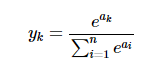

cross entropy 정의
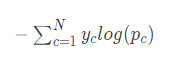

클래스가 3개 일 때 소프트맥스 함수를 취한 값
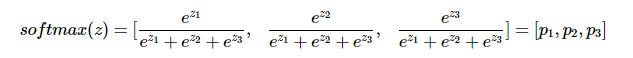

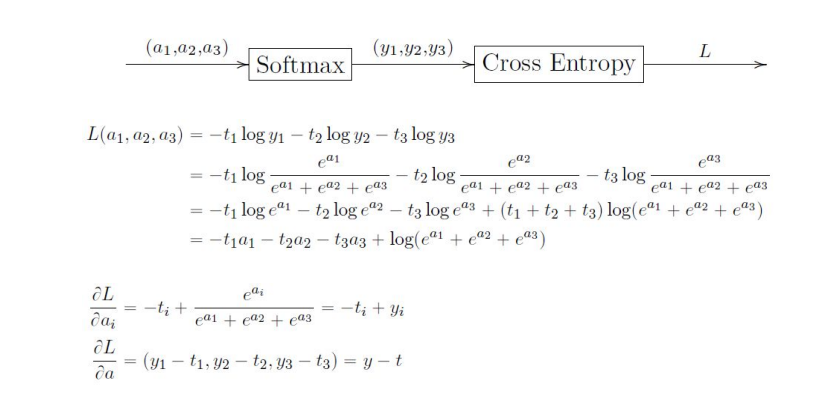
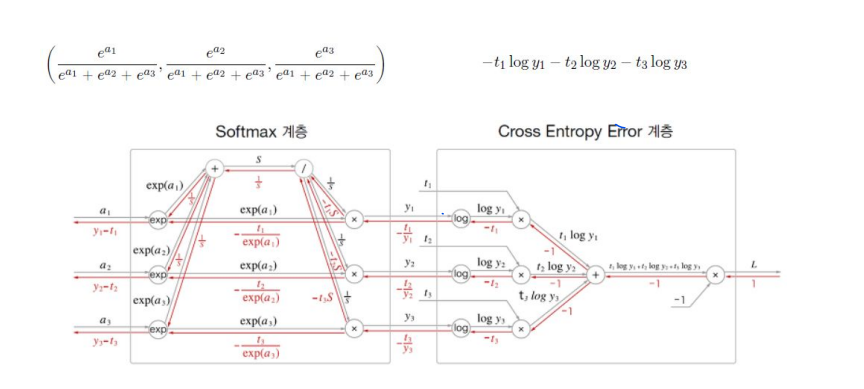

In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
def softmax(x):
    # input, output --> array
    
    array_x = x - np.max(x)
    
    exp_x = np.exp(array_x)
    result = exp_x/np.sum(exp_x)
    return result

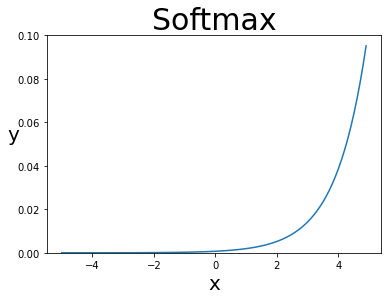

In [19]:
x = np.arange(-5.0, 5.0, 0.1)
y = softmax(x)

fig = plt.figure() # 캔버스 생성
fig.set_facecolor('white')      # 캔버스 색상 설정

plt.plot(x, y)
plt.ylim(0, 0.1)
plt.title("Softmax", fontsize=30)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20, rotation=0)
plt.show()

In [20]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T 

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


In [21]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
        
    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [22]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)
        
    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)
        
        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size
        
        return dx